(1079, 1080, 3)
41
41
507
50


C:\Users\胡逸飞\AppData\Local\Temp\ipykernel_336\2072798907.py:16: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  for [[x, y]] in np.int0(harris):  # 注意这里的双重方括号
C:\Users\胡逸飞\AppData\Local\Temp\ipykernel_336\2072798907.py:25: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  for [[x, y]] in np.int0(shi):  # 注意这里的双重方括号


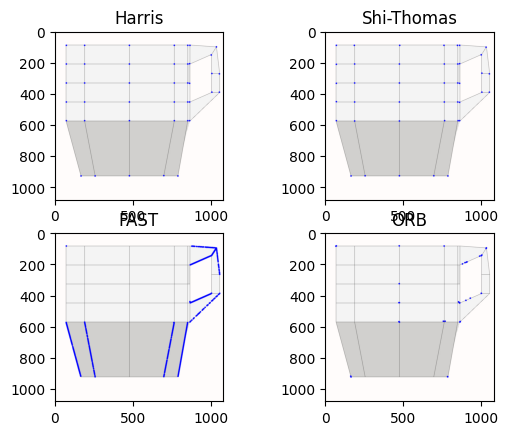

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 加载图像
img = cv2.imread('mug.png')
print(img.shape)
# 转换为灰度图像
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


harris = cv2.goodFeaturesToTrack(gray, 50, 0.01, 10,useHarrisDetector=1)
print(len(harris))
# 用红色标记检测到的角点，并保存
img_harris = np.copy(img)
for [[x, y]] in np.int0(harris):  # 注意这里的双重方括号
    cv2.circle(img_harris, (x, y), 5, [255, 0, 0], -1)
cv2.imwrite('harris.jpg', img_harris)

# Shi-Thomas角点检测
shi = cv2.goodFeaturesToTrack(gray, 41, 0.01, 10,useHarrisDetector=0)
print(len(shi))
# 用红色标记检测到的角点，并保存
img_shi = np.copy(img)
for [[x, y]] in np.int0(shi):  # 注意这里的双重方括号
    cv2.circle(img_shi, (x, y), 5, [255, 0, 0], -1)
cv2.imwrite('shi.jpg', img_shi)

# FAST角点检测
fast = cv2.FastFeatureDetector_create()
fast.setThreshold(50)
fast.setNonmaxSuppression(True)
keypoints = fast.detect(gray, None)
print(len(keypoints))
# 用红色标记检测到的角点，并保存
img_fast = np.copy(img)
for point in keypoints:
    x, y=point.pt
    x = int(x)
    y = int(y)
    cv2.circle(img_fast, (x, y), 5, [255, 0, 0], -1)
cv2.imwrite('fast.jpg', img_fast)

# ORB角点检测
orb = cv2.ORB_create(nfeatures=50)
keypoints = orb.detect(gray, None)
print(len(keypoints))
# 用红色标记检测到的角点，并保存
img_orb = np.copy(img)
for point in keypoints:
    x, y=point.pt
    x = int(x)
    y = int(y)
    cv2.circle(img_orb, (x, y), 5, [255, 0, 0], -1)
cv2.imwrite('orb.jpg', img_orb)

# 使用plt展示四张角点检测图
plt.subplot(221), plt.imshow(cv2.cvtColor(img_harris, cv2.COLOR_BGR2RGB)), plt.title('Harris')
plt.subplot(222), plt.imshow(cv2.cvtColor(img_shi, cv2.COLOR_BGR2RGB)), plt.title('Shi-Thomas')
plt.subplot(223), plt.imshow(cv2.cvtColor(img_fast, cv2.COLOR_BGR2RGB)), plt.title('FAST')
plt.subplot(224), plt.imshow(cv2.cvtColor(img_orb, cv2.COLOR_BGR2RGB)), plt.title('ORB')
plt.show()
